# California Grants Dataset EDA

**EDA Using Python**
- understand data
    - many columns are not very useful
    - some that may be useful are self reported, having no consistency in formatting between rows (award period, estimated amounts.)
- clean data
- analyze variables

In [2]:
# import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
grants_raw = pd.read_csv("ca_grants.csv")

In [4]:
grants_raw.head()

,PortalID,GrantID,Status,LastUpdated,ChangeNotes,AgencyDept,Title,Type,LOI,Categories,...,ApplicationDeadline,AwardPeriod,ExpAwardDate,ElecSubmission,GrantURL,AgencyURL,AgencySubscribeURL,GrantEventsURL,ContactInfo,AwardStats
0,6481,DOJ-PROP56-2022-23-1,active,2022-07-18 17:28:34,"Updated eligibility, suggested activities, and...",Department of Justice (Office of the Attorney ...,Tobacco Grant Program FY 2022-23 Request for P...,Grant,No,"Education; Law, Justice, and Legal Services",...,2022-08-17 23:59:00,2-3 Years,October 2022,email: TobaccoGrantRFP@doj.ca.gov;,https://oag.ca.gov/tobaccogrants,https://oag.ca.gov,NaN,NaN,email: TobaccoGrantRFP@doj.ca.gov; tel: 1-916-...,NaN
1,11966,NaN,active,2022-07-15 22:20:56,"Application open date: July 15, 2022. Updated...",Department of Health Care Access and Information,California State Loan Repayment Program (SLRP),Grant,No,Health & Human Services,...,2022-09-15 15:00:00,2 months,December 2022,url: https://funding.hcai.ca.gov/;,https://hcai.ca.gov/wp-content/uploads/2022/07...,https://hcai.ca.gov/,https://hcai.ca.gov/loans-scholarships-grants/...,NaN,name: State Loan Repayment Program; email: slr...,NaN
2,11960,NaN,active,2022-07-14 22:35:54,NaN,CA Arts Council,Administering Organization – Individual Artist...,Grant,No,Disadvantaged Communities; Libraries and Arts,...,2022-08-31 23:59:00,1/1/23 - 12/31/24,November 2022,url: https://calartscouncil.smartsimple.com/s_...,https://arts.ca.gov/grant_program/individual-a...,https://arts.ca.gov,https://arts.ca.gov/news/artbeat/,https://arts.ca.gov/events/,"name: Josy Miller, Ph.D.; email: artsfellowsgr...",NaN
3,11957,NaN,active,2022-07-14 22:15:54,NaN,CA Arts Council,Administering Organization – Arts Administrato...,Grant,No,Disadvantaged Communities; Education; Employme...,...,2022-08-31 23:59:00,1/1/23 - 12/31/24,November 2022,url: https://calartscouncil.smartsimple.com/s_...,https://arts.ca.gov/grant_program/administerin...,https://arts.ca.gov,https://arts.ca.gov/news/artbeat/,https://arts.ca.gov/events/,"name: Josy Miller, Ph.D.; email: adminfellowgr...",NaN
4,11912,NaN,active,2022-07-14 17:13:34,NaN,Department of Pesticide Regulation,Department of Pesticide Regulation 2023 Allian...,Grant,No,Agriculture; Disadvantaged Communities; Educat...,...,2022-12-08 23:59:00,2.5 years,Late June 2023,email: DPRpmGrants.solicitation@cdpr.ca.gov;,https://www.cdpr.ca.gov/docs/pestmgt/grants/al...,https://www.cdpr.ca.gov,https://www.cdpr.ca.gov/docs/dept/listserv/lis...,https://www.cdpr.ca.gov/docs/pestmgt/grants/al...,name: Tory Vizenor; email: DPRpmGrants.Solicit...,NaN


In [5]:
print(grants_raw.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PortalID             725 non-null    int64 
 1   GrantID              132 non-null    object
 2   Status               725 non-null    object
 3   LastUpdated          725 non-null    object
 4   ChangeNotes          419 non-null    object
 5   AgencyDept           725 non-null    object
 6   Title                725 non-null    object
 7   Type                 725 non-null    object
 8   LOI                  724 non-null    object
 9   Categories           725 non-null    object
 10  CategorySuggestion   94 non-null     object
 11  Purpose              724 non-null    object
 12  Description          725 non-null    object
 13  ApplicantType        721 non-null    object
 14  ApplicantTypeNotes   604 non-null    object
 15  Geography            557 non-null    object
 16  FundingS

In [6]:
# Change ID of the grant to a categorical variable
grants_raw['PortalID'] = grants_raw['PortalID'].astype('object')

Removal of unecessary columns
- columns with excessive missing values
- redundant information
- information that cannot realistically be useful or analyzed

In [7]:
grants = grants_raw.drop(grants_raw.columns[[1,4,10,14,15,17,19,24,27,29,31,32,33,34,35]], axis = 1)
grants.head()

,PortalID,Status,LastUpdated,AgencyDept,Title,Type,LOI,Categories,Purpose,Description,...,FundingSource,MatchingFunds,EstAvailFunds,EstAwards,EstAmounts,FundingMethod,OpenDate,ApplicationDeadline,ExpAwardDate,GrantURL
0,6481,active,2022-07-18 17:28:34,Department of Justice (Office of the Attorney ...,Tobacco Grant Program FY 2022-23 Request for P...,Grant,No,"Education; Law, Justice, and Legal Services",The purpose of this grant offered through the ...,"In accordance with Proposition 56, funds will ...",...,State,Not Required,"$22,000,000","Dependant on number of submissions received, a...","Dependant on number of submissions received, a...",Reimbursement(s),2022-07-18 19:15:00,2022-08-17 23:59:00,October 2022,https://oag.ca.gov/tobaccogrants
1,11966,active,2022-07-15 22:20:56,Department of Health Care Access and Information,California State Loan Repayment Program (SLRP),Grant,No,Health & Human Services,The California State Loan Repayment Program (S...,California State Loan Repayment Program (SLRP)...,...,Federal and State,Not Required,"$5,000,000","Dependant on number of submissions received, a...","Between $5,000 and $50,000",Advances & Reimbursement(s),2022-07-15 07:00:00,2022-09-15 15:00:00,December 2022,https://hcai.ca.gov/wp-content/uploads/2022/07...
2,11960,active,2022-07-14 22:35:54,CA Arts Council,Administering Organization – Individual Artist...,Grant,No,Disadvantaged Communities; Libraries and Arts,The Administering Organization – Individual Ar...,The CAC is seeking applications from AOs with ...,...,State,Not Required,NaN,"Dependant on number of submissions received, a...","Dependant on number of submissions received, a...",Advance(s),2022-07-14 07:00:00,2022-08-31 23:59:00,November 2022,https://arts.ca.gov/grant_program/individual-a...
3,11957,active,2022-07-14 22:15:54,CA Arts Council,Administering Organization – Arts Administrato...,Grant,No,Disadvantaged Communities; Education; Employme...,The Arts Administrators Pipeline Fellowship pr...,The AO will implement a fellow-driven grant pr...,...,State,Not Required,"$1,165,000",Exactly 1,"$1,165,000",Advances & Reimbursement(s),2022-07-14 07:00:00,2022-08-31 23:59:00,November 2022,https://arts.ca.gov/grant_program/administerin...
4,11912,active,2022-07-14 17:13:34,Department of Pesticide Regulation,Department of Pesticide Regulation 2023 Allian...,Grant,No,Agriculture; Disadvantaged Communities; Educat...,"To promote safer, more sustainable pest manage...",DPR's Alliance Grants Program has $1.5 million...,...,State,Not Required,"$1,500,000",Between 1 and 30,"Between $50,000 and $1,500,000",Reimbursement(s),2022-07-14 07:00:00,2022-12-08 23:59:00,Late June 2023,https://www.cdpr.ca.gov/docs/pestmgt/grants/al...


In [8]:
# Columns we are left with
print(grants.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PortalID             725 non-null    object
 1   Status               725 non-null    object
 2   LastUpdated          725 non-null    object
 3   AgencyDept           725 non-null    object
 4   Title                725 non-null    object
 5   Type                 725 non-null    object
 6   LOI                  724 non-null    object
 7   Categories           725 non-null    object
 8   Purpose              724 non-null    object
 9   Description          725 non-null    object
 10  ApplicantType        721 non-null    object
 11  FundingSource        721 non-null    object
 12  MatchingFunds        725 non-null    object
 13  EstAvailFunds        713 non-null    object
 14  EstAwards            725 non-null    object
 15  EstAmounts           725 non-null    object
 16  FundingM

In [9]:
grants.AgencyDept.value_counts()
grants.AgencyDept.unique()

array(['Department of Justice (Office of the Attorney General)',
       'Department of Health Care Access and Information',
       'CA Arts Council', 'Department of Pesticide Regulation',
       "Governor's Office of Emergency Services",
       'Department of Social Services',
       'Department of Forestry and Fire Protection',
       'Board of State and Community Corrections', 'CA State Library',
       'Workforce Development Board',
       'Department of Parks and Recreation',
       "Governor's Office of Business and Economic Development",
       'Coachella Valley Mountains Conservancy',
       'Department of Conservation', 'Coastal Commission',
       'Department of Resources Recycling and Recovery',
       'CA Department of Food and Agriculture', 'CA Energy Commission',
       'CA Natural Resources Agency', 'Victim Compensation Board',
       'Department of Community Services and Development',
       'Department of Housing and Community Development',
       'Sierra Nevada Conserv

In [10]:

grants.describe(include=["object"]) #no duplicate rows

,PortalID,Status,LastUpdated,AgencyDept,Title,Type,LOI,Categories,Purpose,Description,...,FundingSource,MatchingFunds,EstAvailFunds,EstAwards,EstAmounts,FundingMethod,OpenDate,ApplicationDeadline,ExpAwardDate,GrantURL
count,725,725,725,725,725,725,724,725,724,725,...,721,725,713,725,725,719,720,715,713,725
unique,725,3,725,61,659,3,2,196,628,678,...,4,22,323,67,201,4,434,445,352,487
top,6481,closed,2022-07-18 17:28:34,Governor's Office of Emergency Services,Vertebrate Pest Control Research Program,Grant,No,Environment & Water,The purpose of the Cannabis Tax Fund Grant Pro...,The Vertebrate Pest Control Research Program i...,...,State,Not Required,"$2,000,000","Dependant on number of submissions received, a...","Dependant on number of submissions received, a...",Reimbursement(s),2022-04-28 07:00:00,Ongoing,Continuous,https://www.energy.ca.gov/
freq,1,572,1,48,4,657,576,94,7,3,...,520,539,33,577,446,435,13,94,21,28


Converting the columns 'EstAwards', 'EstAmounts', and 'EstAvailFunds' into numeric variables. Unique values reveal that the entries for these two columns are formatted consistently.
As many entries contain a range of values these columns were each split into 2, relecting their maximum and minimum values. Undeclared entries were replaces with a missing value (NaN).

In [11]:
grants['EstAwards'].unique()

array(['Dependant on number of submissions received, application process, etc.',
       'Exactly 1', 'Between 1 and 30', 'Between 1 and 63',
       'Between 1 and 6', 'Exactly 21', 'Exactly 10', 'Between 1 and 2',
       'Between 50 and 60', 'Between 4 and 7', 'Exactly 13', 'Exactly 2',
       'Exactly 5', 'Exactly 14', 'Exactly 20', 'Exactly 4', 'Exactly 3',
       'Between 35 and 35', 'Between 25 and 40', 'Between 2 and 10',
       'Between 500 and 1000', 'Between 30 and 35', 'Between 0 and 0',
       'Between 0 and 77', 'Exactly 7', 'Exactly 50', 'Between 10 and 20',
       'Between 0 and 100', 'Exactly 40', 'Between 0 and 20',
       'Between 1 and 8', 'Exactly 70', 'Exactly 6', 'Between 8 and 12',
       'Exactly 100', 'Between 0 and 62732', 'Between 0 and 270',
       'Between 0 and 675', 'Between 15 and 30', 'Exactly 225',
       'Between 2 and 4', 'Between 0 and 58', 'Between 1 and 17',
       'Between 20 and 30', 'Between 1 and 18',
       'Between 100000 and 500000', 'Between

In [12]:
awards = grants['EstAwards']
maxaward = []
minaward = []
for i in (range(len(awards))):
    if awards[i][0] == 'E':
        maxaward.append(int(''.join(filter(str.isdigit, awards[i]))))
        minaward.append(int(''.join(filter(str.isdigit, awards[i]))))
    elif awards[i][0] == 'B':
        maxaward.append(int(''.join(filter(str.isdigit, awards[i].rpartition('a')[2]))))
        minaward.append(int(''.join(filter(str.isdigit, awards[i].rpartition('a')[0]))))
    else:
        maxaward.append(float('nan'))
        minaward.append(float('nan'))
        
        
amounts = grants['EstAmounts']
maxamnt = []
minamnt = []
for i in (range(len(amounts))):
    if amounts[i][0] == 'E':
        maxamnt.append(int(''.join(filter(str.isdigit, amounts[i]))))
        minamnt.append(int(''.join(filter(str.isdigit, amounts[i]))))
    elif amounts[i][0] == 'B':
        maxamnt.append(int(''.join(filter(str.isdigit, amounts[i].rpartition('a')[2]))))
        minamnt.append(int(''.join(filter(str.isdigit, amounts[i].rpartition('a')[0]))))
    else:
        maxamnt.append(float('nan'))
        minamnt.append(float('nan'))

In [13]:
grants['MaxAwards'] = maxaward
grants['MinAwards'] = minaward
grants = grants.drop('EstAwards', axis = 1)

grants['MaxAmounts'] = maxamnt
grants['MinAmounts'] = minamnt
grants = grants.drop('EstAmounts', axis = 1)

In [14]:
availfunds = []
for i in (range(len(grants['EstAvailFunds']))):
    if type(grants['EstAvailFunds'][i]) != str:
        availfunds.append(float('nan'))
    else:
        availfunds.append(int(''.join(filter(str.isdigit, grants['EstAvailFunds'][i]))))

In [15]:
grants['EstAvailFunds'] = availfunds  
grants.head()

,PortalID,Status,LastUpdated,AgencyDept,Title,Type,LOI,Categories,Purpose,Description,...,EstAvailFunds,FundingMethod,OpenDate,ApplicationDeadline,ExpAwardDate,GrantURL,MaxAwards,MinAwards,MaxAmounts,MinAmounts
0,6481,active,2022-07-18 17:28:34,Department of Justice (Office of the Attorney ...,Tobacco Grant Program FY 2022-23 Request for P...,Grant,No,"Education; Law, Justice, and Legal Services",The purpose of this grant offered through the ...,"In accordance with Proposition 56, funds will ...",...,22000000.0,Reimbursement(s),2022-07-18 19:15:00,2022-08-17 23:59:00,October 2022,https://oag.ca.gov/tobaccogrants,NaN,NaN,NaN,NaN
1,11966,active,2022-07-15 22:20:56,Department of Health Care Access and Information,California State Loan Repayment Program (SLRP),Grant,No,Health & Human Services,The California State Loan Repayment Program (S...,California State Loan Repayment Program (SLRP)...,...,5000000.0,Advances & Reimbursement(s),2022-07-15 07:00:00,2022-09-15 15:00:00,December 2022,https://hcai.ca.gov/wp-content/uploads/2022/07...,NaN,NaN,50000.0,5000.0
2,11960,active,2022-07-14 22:35:54,CA Arts Council,Administering Organization – Individual Artist...,Grant,No,Disadvantaged Communities; Libraries and Arts,The Administering Organization – Individual Ar...,The CAC is seeking applications from AOs with ...,...,NaN,Advance(s),2022-07-14 07:00:00,2022-08-31 23:59:00,November 2022,https://arts.ca.gov/grant_program/individual-a...,NaN,NaN,NaN,NaN
3,11957,active,2022-07-14 22:15:54,CA Arts Council,Administering Organization – Arts Administrato...,Grant,No,Disadvantaged Communities; Education; Employme...,The Arts Administrators Pipeline Fellowship pr...,The AO will implement a fellow-driven grant pr...,...,1165000.0,Advances & Reimbursement(s),2022-07-14 07:00:00,2022-08-31 23:59:00,November 2022,https://arts.ca.gov/grant_program/administerin...,1.0,1.0,NaN,NaN
4,11912,active,2022-07-14 17:13:34,Department of Pesticide Regulation,Department of Pesticide Regulation 2023 Allian...,Grant,No,Agriculture; Disadvantaged Communities; Educat...,"To promote safer, more sustainable pest manage...",DPR's Alliance Grants Program has $1.5 million...,...,1500000.0,Reimbursement(s),2022-07-14 07:00:00,2022-12-08 23:59:00,Late June 2023,https://www.cdpr.ca.gov/docs/pestmgt/grants/al...,30.0,1.0,1500000.0,50000.0


In [16]:
print(grants.info()) # Our new columns are left with mostly missing values as a majority of entries were undeclared

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PortalID             725 non-null    object 
 1   Status               725 non-null    object 
 2   LastUpdated          725 non-null    object 
 3   AgencyDept           725 non-null    object 
 4   Title                725 non-null    object 
 5   Type                 725 non-null    object 
 6   LOI                  724 non-null    object 
 7   Categories           725 non-null    object 
 8   Purpose              724 non-null    object 
 9   Description          725 non-null    object 
 10  ApplicantType        721 non-null    object 
 11  FundingSource        721 non-null    object 
 12  MatchingFunds        725 non-null    object 
 13  EstAvailFunds        713 non-null    float64
 14  FundingMethod        719 non-null    object 
 15  OpenDate             720 non-null    obj

In [17]:
grants.describe(include=["object"])

,PortalID,Status,LastUpdated,AgencyDept,Title,Type,LOI,Categories,Purpose,Description,ApplicantType,FundingSource,MatchingFunds,FundingMethod,OpenDate,ApplicationDeadline,ExpAwardDate,GrantURL
count,725,725,725,725,725,725,724,725,724,725,721,721,725,719,720,715,713,725
unique,725,3,725,61,659,3,2,196,628,678,24,4,22,4,434,445,352,487
top,6481,closed,2022-07-18 17:28:34,Governor's Office of Emergency Services,Vertebrate Pest Control Research Program,Grant,No,Environment & Water,The purpose of the Cannabis Tax Fund Grant Pro...,The Vertebrate Pest Control Research Program i...,Nonprofit; Public Agency; Tribal Government,State,Not Required,Reimbursement(s),2022-04-28 07:00:00,Ongoing,Continuous,https://www.energy.ca.gov/
freq,1,572,1,48,4,657,576,94,7,3,191,520,539,435,13,94,21,28


In [18]:
grants.describe()

,EstAvailFunds,MaxAwards,MinAwards,MaxAmounts,MinAmounts
count,7.130000e+02,148.000000,148.000000,2.310000e+02,2.310000e+02
mean,6.380992e+07,3834.182432,693.114865,4.843356e+07,3.098185e+05
std,3.500748e+08,41384.329800,8218.712299,4.652575e+08,1.404581e+06
min,1.000000e+00,0.000000,0.000000,1.380000e+02,0.000000e+00
25%,1.170000e+06,2.000000,1.000000,1.000000e+05,0.000000e+00
50%,5.000000e+06,7.000000,2.000000,3.500000e+05,5.000000e+03
75%,2.000000e+07,20.000000,12.250000,1.500000e+06,5.000000e+04
max,5.000000e+09,500000.000000,100000.000000,5.000000e+09,1.500000e+07


**Exploring the Numeric Variables**

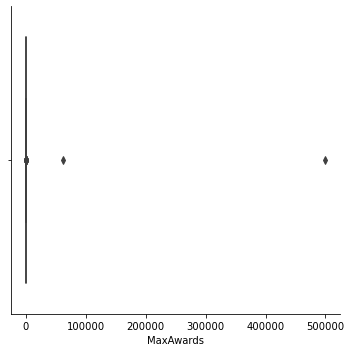

In [19]:
sns.catplot(x = 'MaxAwards', kind = 'box', data = grants)
grants2 = grants[grants["MaxAwards"] < 50000] # remove the excessively large outliars

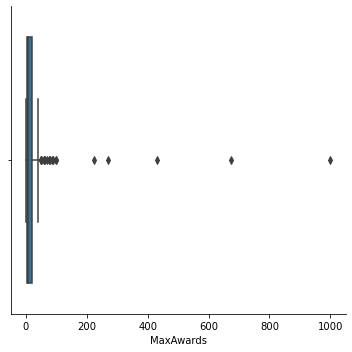

In [20]:
sns.catplot(x = 'MaxAwards', kind = 'box', data = grants2) # still many outliars to potentially remove

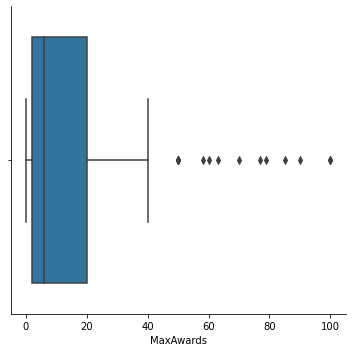

In [21]:
grants3 = grants[grants["MaxAwards"] < 200] # further subset our data
sns.catplot(x = 'MaxAwards', kind = 'box', data = grants3)

<AxesSubplot:xlabel='FundingSource', ylabel='EstAvailFunds'>

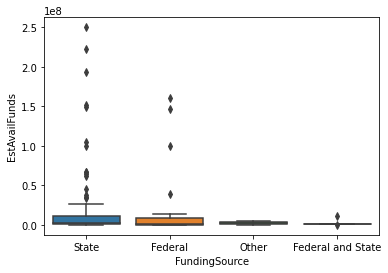

In [22]:
# Potential relationship: Funding Source and Maximum Awards?
sns.boxplot(x = 'FundingSource', y = 'EstAvailFunds', data = grants2) #bulk of outliers are coming from state grants

<AxesSubplot:xlabel='FundingSource', ylabel='count'>

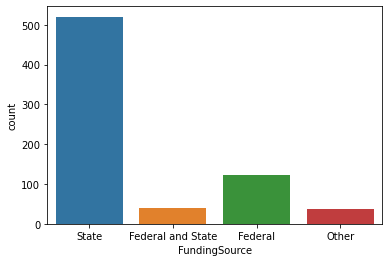

In [23]:
sns.countplot(x = 'FundingSource', data = grants) #to be expected as we are dealing with CA

<AxesSubplot:xlabel='FundingMethod', ylabel='count'>

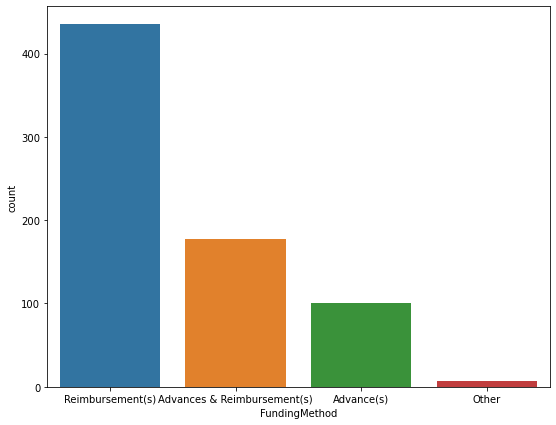

In [24]:
# Another potentially interesting variable to consider: Funding Method
fig, ax = plt.subplots()
fig.set_size_inches(9,7)
sns.countplot(x = 'FundingMethod', data = grants, ax = ax)

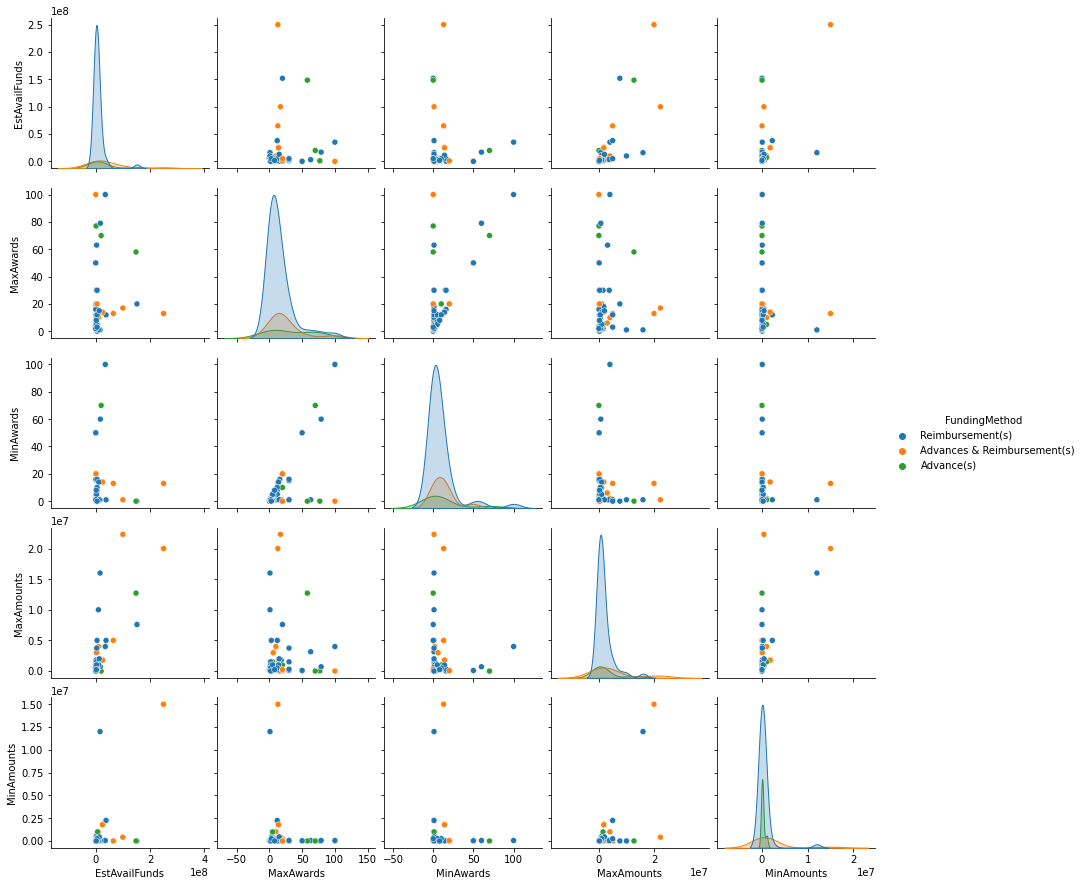

In [25]:
# Looking further into funding method
grants4 = grants3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) # removing missing values
sns.pairplot(data = grants4.drop('PortalID', axis = 1), hue = 'FundingMethod')

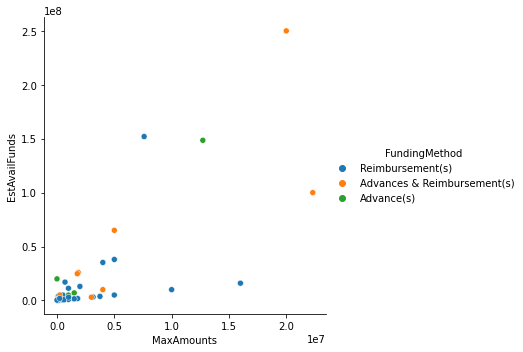

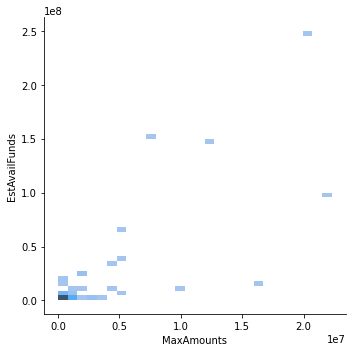

In [26]:
# Most interesting scatter: Maximum Amount vs Estimated Available Funds?
sns.relplot(x = 'MaxAmounts', y = 'EstAvailFunds', hue = 'FundingMethod', data = grants4)
sns.displot(data = grants4, x = 'MaxAmounts', y = 'EstAvailFunds')

Next Steps
- apply transformation
- linear model/analysis
- potential multivariate analysis as well?
- exploring the categories (split them up?)
- which agencies? whats useful?
- distribution of which agencies that are reporting stuff
- contextualize the data (are these values legit)
- are they even available?


# California Grants: Further Analysis

In [27]:
grants.info()
grants.ApplicationDeadline.value_counts().head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PortalID             725 non-null    object 
 1   Status               725 non-null    object 
 2   LastUpdated          725 non-null    object 
 3   AgencyDept           725 non-null    object 
 4   Title                725 non-null    object 
 5   Type                 725 non-null    object 
 6   LOI                  724 non-null    object 
 7   Categories           725 non-null    object 
 8   Purpose              724 non-null    object 
 9   Description          725 non-null    object 
 10  ApplicantType        721 non-null    object 
 11  FundingSource        721 non-null    object 
 12  MatchingFunds        725 non-null    object 
 13  EstAvailFunds        713 non-null    float64
 14  FundingMethod        719 non-null    object 
 15  OpenDate             720 non-null    obj

Ongoing                94
2021-10-29 17:00:00     9
2022-06-23 23:59:00     9
2021-02-23 17:00:00     8
2022-03-09 23:59:00     7
Name: ApplicationDeadline, dtype: int64

**While some grants do state if whether they are ongoing, some have dates in the near or far future**
- since this dataset and ongoing status is constantly changing find a way to determine the amount of objects that are ongoing
- a function that can be used for future iterations of this dataset?

In [28]:
deadline = grants.ApplicationDeadline
ongoing = []
for i in deadline:
    if type(i) == float:
        ongoing.append(0)
    elif i[0] == 'O':
        ongoing.append(1)
    elif i[0] == '2':
        temp = pd.to_datetime(i, format="%Y-%m-%d %H:%M:%S")
        today = pd.datetime.now()
        if temp < today:
            ongoing.append(0)
        else:
            ongoing.append(1)
grants['IsOngoing'] = ongoing

C:\Users\joshu\AppData\Local\Temp\ipykernel_30100\4256576508.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = pd.datetime.now()


In [29]:
grants.AgencyDept.unique()

array(['Department of Justice (Office of the Attorney General)',
       'Department of Health Care Access and Information',
       'CA Arts Council', 'Department of Pesticide Regulation',
       "Governor's Office of Emergency Services",
       'Department of Social Services',
       'Department of Forestry and Fire Protection',
       'Board of State and Community Corrections', 'CA State Library',
       'Workforce Development Board',
       'Department of Parks and Recreation',
       "Governor's Office of Business and Economic Development",
       'Coachella Valley Mountains Conservancy',
       'Department of Conservation', 'Coastal Commission',
       'Department of Resources Recycling and Recovery',
       'CA Department of Food and Agriculture', 'CA Energy Commission',
       'CA Natural Resources Agency', 'Victim Compensation Board',
       'Department of Community Services and Development',
       'Department of Housing and Community Development',
       'Sierra Nevada Conserv

**Which Agencies are Reporting ?**

<AxesSubplot:xlabel='AgencyDept', ylabel='count'>

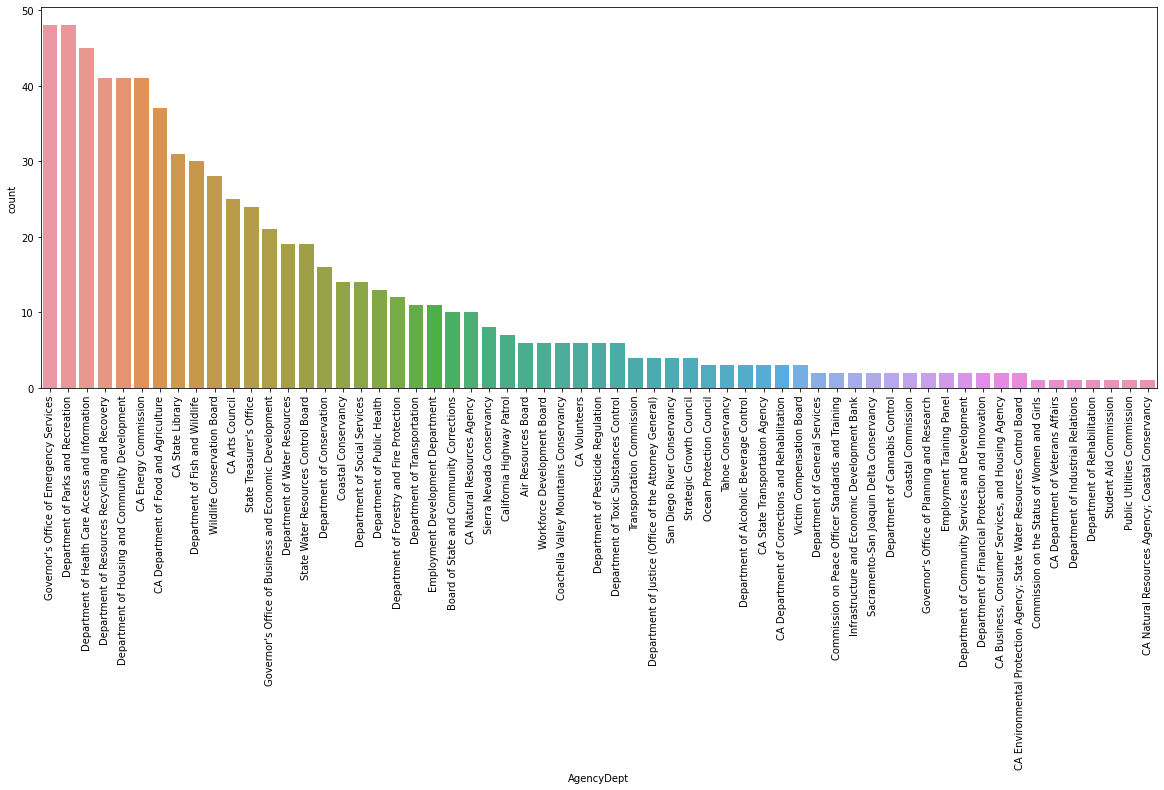

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(20,7)
plt.xticks(rotation = 90)
sns.countplot(x = 'AgencyDept', data = grants, ax = ax, order = grants.AgencyDept.value_counts().index)

<AxesSubplot:xlabel='AgencyDept', ylabel='count'>

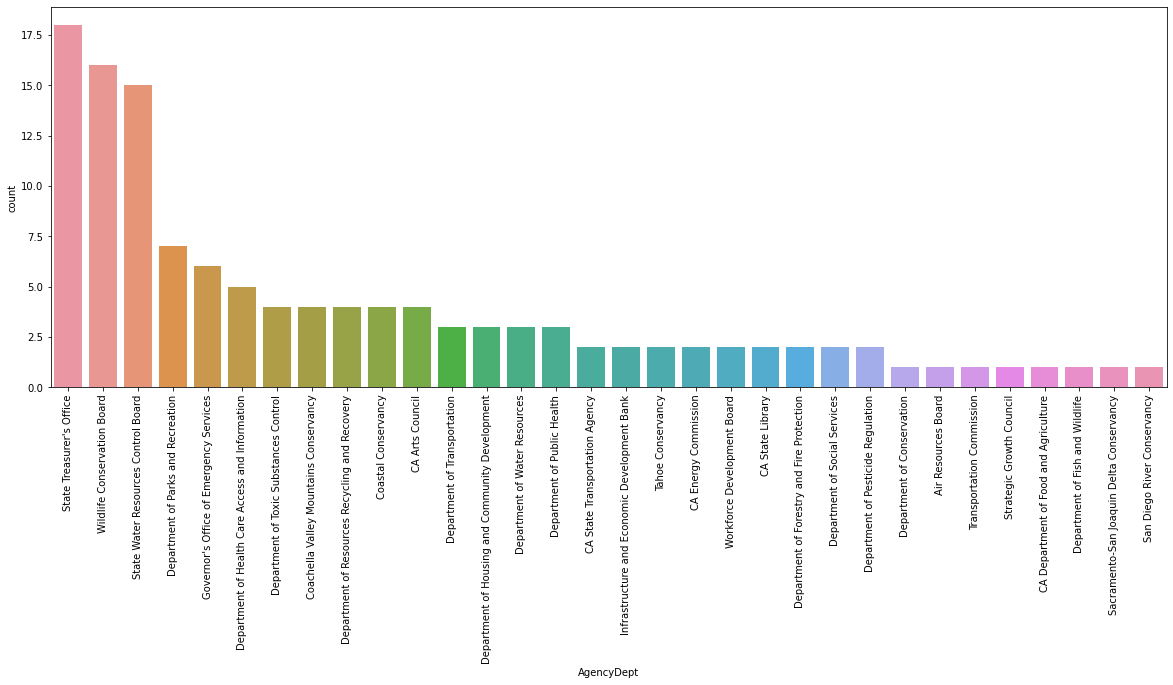

In [31]:
# For ongoing grants?
grants_ongoing = grants[grants['IsOngoing'] == 1]
fig, ax = plt.subplots()
fig.set_size_inches(20,7)
plt.xticks(rotation = 90)
sns.countplot(x = 'AgencyDept', data = grants_ongoing, ax = ax, order = grants_ongoing.AgencyDept.value_counts().index)

In [32]:
grants.AgencyDept.unique() == grants_ongoing.AgencyDept.unique()

C:\Users\joshu\AppData\Local\Temp\ipykernel_30100\1530125029.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  grants.AgencyDept.unique() == grants_ongoing.AgencyDept.unique()


False

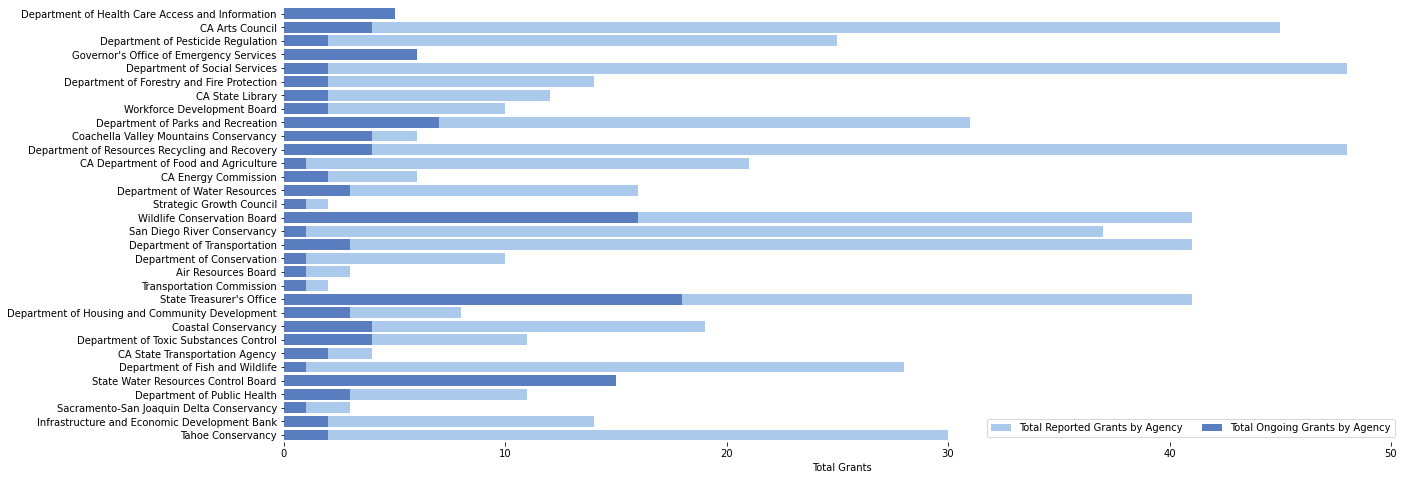

In [33]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20,8))

# Plot 
sns.set_color_codes("pastel")
sns.countplot(y = "AgencyDept", data = grants, label= "Total Reported Grants by Agency", color="b", orient = 'h')

# Differentiate between ongoing grants
sns.set_color_codes("muted")
sns.countplot(y = "AgencyDept", data = grants_ongoing, label= "Total Ongoing Grants by Agency", color="b", orient = 'h')

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Total Grants")
sns.despine(left=True, bottom=True)

# Agencies with no ongoing grants are omitted

**Of ongoing grants, average amounts/awards by agency?**

In [34]:
print(grants_ongoing.MaxAwards.groupby(grants_ongoing.AgencyDept).mean().sort_values(ascending = False).head(10))
print(grants_ongoing.MaxAmounts.groupby(grants_ongoing.AgencyDept).mean().sort_values(ascending = False).head(10))

AgencyDept
Department of Pesticide Regulation       46.500000
State Water Resources Control Board      44.000000
State Treasurer's Office                 20.000000
CA Arts Council                          17.333333
Department of Parks and Recreation       11.333333
Department of Water Resources             7.000000
Department of Social Services             6.000000
Air Resources Board                       1.000000
CA Department of Food and Agriculture          NaN
CA Energy Commission                           NaN
Name: MaxAwards, dtype: float64
AgencyDept
State Treasurer's Office                            1.193111e+09
Department of Transportation                        1.000000e+07
State Water Resources Control Board                 2.941667e+06
Department of Pesticide Regulation                  2.325000e+06
Strategic Growth Council                            1.750000e+06
Department of Toxic Substances Control              9.833333e+05
Coachella Valley Mountains Conservancy        

**Exploring the different categories of grants**

In [35]:
# create a potential function for a UI ?
grants_ongoing.Categories.unique()

array(['Health & Human Services',
       'Disadvantaged Communities; Libraries and Arts',
       'Disadvantaged Communities; Education; Employment, Labor & Training; Libraries and Arts',
       'Agriculture; Disadvantaged Communities; Education; Employment, Labor & Training; Environment & Water; Food & Nutrition; Housing, Community and Economic Development; Parks & Recreation; Science, Technology, and Research & Development',
       'Law, Justice, and Legal Services',
       'Disadvantaged Communities; Education; Health & Human Services; Housing, Community and Economic Development',
       'Agriculture; Environment & Water',
       'Energy; Environment & Water; Food & Nutrition; Libraries and Arts; Science, Technology, and Research & Development',
       'Employment, Labor & Training',
       'Consumer Protection; Health & Human Services; Housing, Community and Economic Development; Law, Justice, and Legal Services',
       'Consumer Protection; Disadvantaged Communities; Health & Huma

In [36]:
# dictionary to tally each different category
cat = {}
for i in grants_ongoing.Categories:
    for j in i.split('; '):
        if j not in cat:
            cat[j] = 1
        else:
            cat[j] += 1
            
categories_data = pd.DataFrame({'category': cat.keys(), 'count': cat.values()})  
categories_data

,category,count
0,Health & Human Services,16
1,Disadvantaged Communities,40
2,Libraries and Arts,5
3,Education,14
4,"Employment, Labor & Training",9
5,Agriculture,10
6,Environment & Water,72
7,Food & Nutrition,3
8,"Housing, Community and Economic Development",17
9,Parks & Recreation,21


**Export new datasets/files**

In [38]:
# Cleaned California Grants Data
grants.to_csv('ca_grants_clean.csv', header=True, index=False)

# Ongoing Grants
grants_ongoing.to_csv('grants_ongoing.csv', header=True, index=False)

# Table of Categories
categories_data.to_csv('category_table.csv', header=True, index=False)